In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn import preprocessing

warnings.filterwarnings('ignore')

In [49]:
ds = pd.read_csv('./course_project_train.csv')

In [50]:
ds.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [51]:
ds.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [52]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [53]:
ds.shape

(7500, 17)

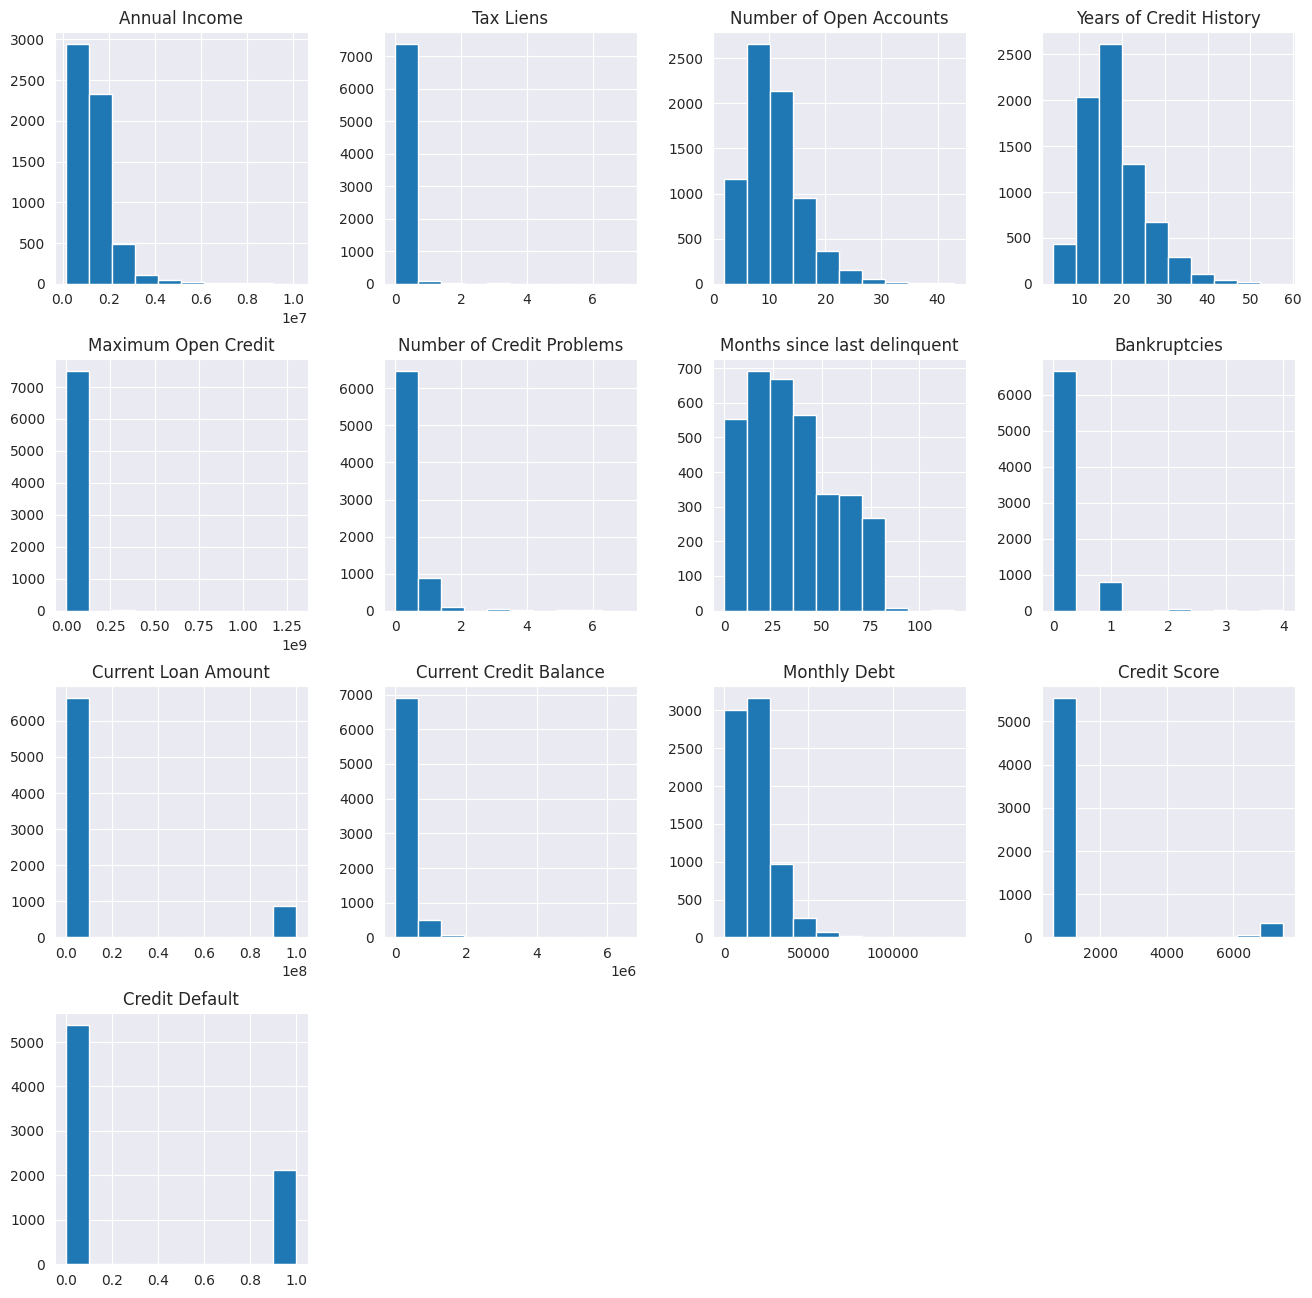

In [54]:
ds.hist(figsize=(16,16))
plt.show()

<AxesSubplot:>

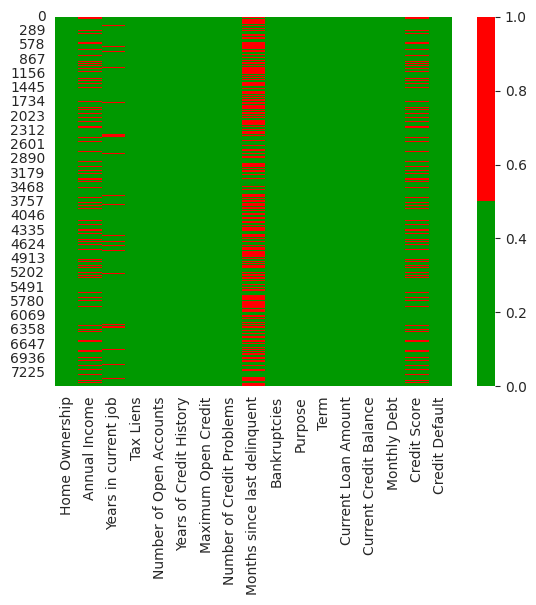

In [55]:
colours = ['#009900', '#ff0000']
sns.heatmap(ds.isnull(), cmap=sns.color_palette(colours))

In [56]:
num_rows = len(ds.index)
low_information_cols = [] #

for col in ds.columns:
    cnts = ds[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Tax Liens: 98.21333%
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64



,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.101787,-0.066877,0.032082,0.386481,0.584819,-0.037832,-0.101375
Tax Liens,0.066245,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.188524,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,0.186531,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,0.062218,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,-0.015407,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,-0.101787,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,-0.066877,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,0.032082,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522
Current Credit Balance,0.386481,-0.010195,0.267325,0.217856,0.088090,-0.124137,-0.027198,-0.142849,0.016672,1.000000,0.504964,-0.006159,-0.019522


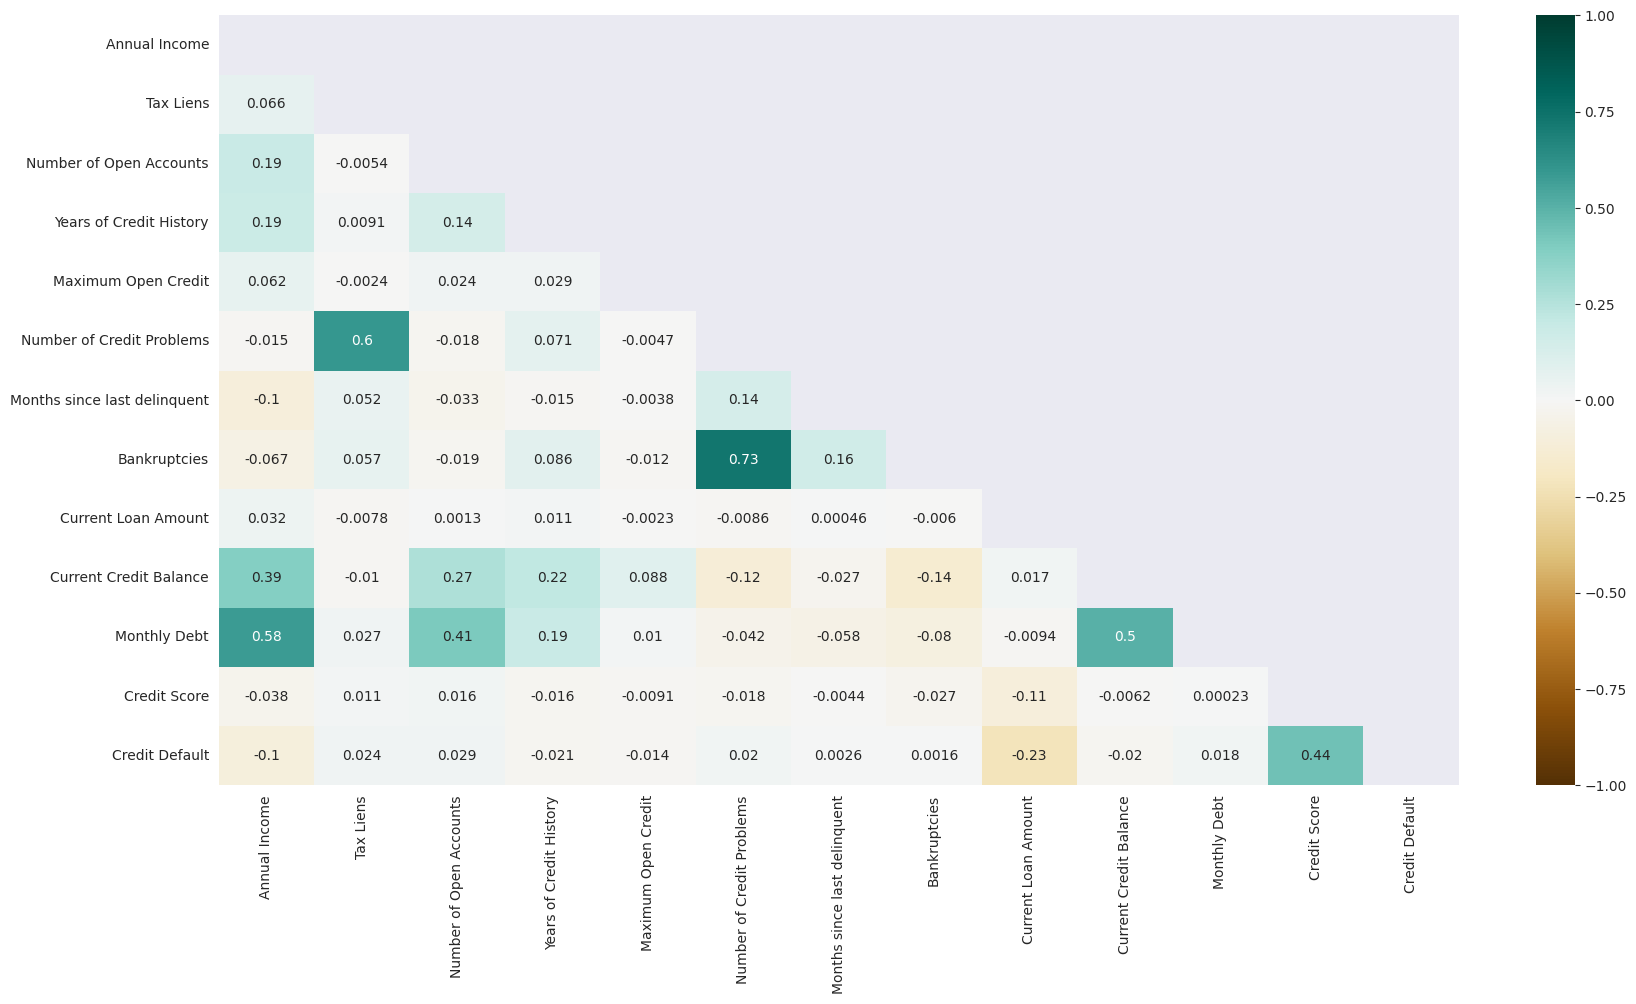

In [57]:
plt.figure(figsize=(20,10))
c= ds.corr()
cor_matrix_mask = np.triu(np.ones_like(c, dtype=bool))
sns.heatmap(c,cmap="BrBG",annot=True, vmin=-1, vmax=1, mask=cor_matrix_mask)
c

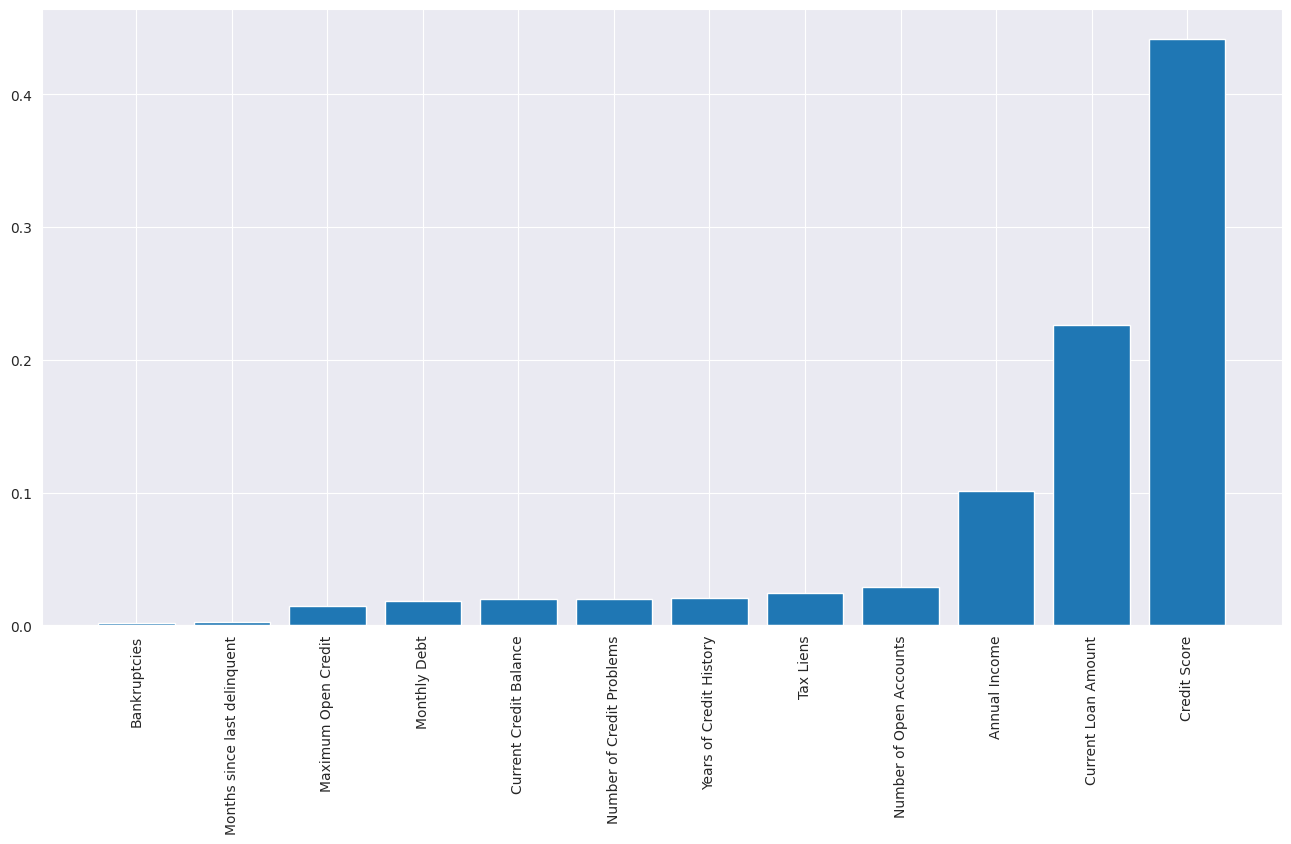

In [58]:
price_corr = ds.corr().abs()
price_corr = price_corr.unstack().sort_values()['Credit Default']

plt.figure(figsize = (16, 8))
plt.bar(list(price_corr.keys())[:-1], list(price_corr)[:-1])
plt.xticks(rotation=90)
plt.show()

In [59]:
ds['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

Можно предположить что люди имея собственное жильё с большей вероятностью погасят кредит, после те кто арендуют и на послднем те кто имеет ипотеку

Для начала проверим

In [60]:
ds.groupby(['Home Ownership','Credit Default']).size()

Home Ownership  Credit Default
Have Mortgage   0                   10
                1                    2
Home Mortgage   0                 2721
                1                  916
Own Home        0                  455
                1                  192
Rent            0                 2201
                1                 1003
dtype: int64

Видимо нет...

In [61]:
home_ownership_map = {'Own Home': 3,
'Home Mortgage': 2,
'Rent': 1,
'Have Mortgage': 2
}
ds['Home Ownership'] = ds['Home Ownership'].map(home_ownership_map)

In [62]:
ds.groupby(['Home Ownership','Credit Default']).size()

Home Ownership  Credit Default
1               0                 2201
                1                 1003
2               0                 2731
                1                  918
3               0                  455
                1                  192
dtype: int64

In [63]:
sel_cols = [column for column, is_type in (ds.dtypes=="object").items() if is_type]
sel_cols

['Years in current job', 'Purpose', 'Term']

### Разбираемся с полем Years in current job

In [64]:
ds['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [65]:
ds.groupby(['Years in current job','Credit Default']).size()

Years in current job  Credit Default
1 year                0                  362
                      1                  142
10+ years             0                 1688
                      1                  644
2 years               0                  512
                      1                  193
3 years               0                  450
                      1                  170
4 years               0                  338
                      1                  131
5 years               0                  371
                      1                  145
6 years               0                  302
                      1                  124
7 years               0                  285
                      1                  111
8 years               0                  247
                      1                   92
9 years               0                  194
                      1                   65
< 1 year              0                  404
                  

In [70]:
def fix_year(row):
    year = row['Years in current job']
    if not year or year == np.nan or year == 'nan':
        year = 0
    else:
        year = str(year).replace(' years','').replace('+','').replace(' year','')
        if year == '< 1':
            year = 0
    row['Years in current job'] = year
    return row
ds['Years in current job'].fillna(0)
ds = ds.apply(fix_year, axis=1)
ds['Years in current job'] = ds['Years in current job'].astype(int)

### Purpose

In [74]:
ds['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
ds['Purpose'] = enc.fit_transform(ds['Purpose'])
# enc_df = pd.DataFrame(enc.fit_transform(ds[['Purpose']]).toarray())
# ds = ds.join(enc_df)

In [76]:
# ds.drop(['Purpose'], axis=1, inplace=True)
ds.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,3,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,3,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,3,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,3,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,3,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,805068.0,6,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,3,Short Term,121396.0,95855.0,11338.0,694.0,0
4,1,776264.0,8,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,3,Short Term,125840.0,93309.0,7180.0,719.0,0


### Term

In [77]:
ds['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [78]:
ds.replace({'Term':{'Short Term': 0,'Long Term': 1}}, inplace=True)

### FILL NaN

In [82]:
ds.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [86]:
ds['Bankruptcies'].fillna(0, inplace=True)
ds['Months since last delinquent'].fillna(0, inplace=True)
ds.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent       0
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [114]:
ds.groupby(['Years in current job'])['Annual Income'].transform('mean')

0       1.092795e+06
1       1.510598e+06
2       1.390800e+06
3       1.311730e+06
4       1.390800e+06
            ...     
7495    1.092795e+06
7496    1.268811e+06
7497    1.311730e+06
7498    1.092795e+06
7499    1.371733e+06
Name: Annual Income, Length: 7500, dtype: float64

In [115]:
ds['Annual Income'] = ds['Annual Income'].fillna(ds.groupby(['Years in current job'])['Annual Income'].transform('mean'))

In [116]:
ds.isnull().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent       0
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [118]:
ds.to_csv('./prep.csv')